#Introduction to PyTorch

In order to understand the basics of PyTorch and some of the concepts we have covered in the previous workshop we will, work through a linear regression problem with heart disease. This is in order to predict the likelihood of heart disease based on how many hours of bike riding a week and smokes a week.

 ***Training Data:***


<img src = 'https://imgur.com/eGaxYym.png' width = 400px/>



```
heart_disease = w1 * biking + w2 * smoking + b1
```

# What is our aim?

Our aim is to find values for these weights w1 and w2 such that we can predict the persons likelihood of heart disease given the number of hours ridden and smoked.

If we think about this problem having only one factor altering the likelihood of heart disease say, bike riding, and we had several tuples of data (hrs_ridden,likelihood). If we were approximating a line to these points we would want to adjust the gradient of

*y= mx + b*

such that it nicely reflects the trend of the plotted data.


<img src = 'https://imgur.com/R0T8B4M.png' width = 600px/>

We are essentially doing the same thing when we're training our model, we will adjust the weights w1, w2 and b1 fractionally each several times untill our model makes better predictions

# Data for training

In [1]:
import numpy as np
import torch

We will use numpy to create numpy arrays which we will convert later into tensors. As often you will be dealing with data in formats such as CSV, where you will be using numpy or pandas to process it.

(A tensor is a number, vector, matrix, basically an n-dimensional array)

** They can hold one single type ie. All floating point numbers or all integers

```
# To create a tensor in PyTorch
  tensor = torch.tensor([1.,2,3,4,5])

  # As element 0, 1. is a floating point number the rest of the number will become floating point numbers!!
```







##Importing Data

In [3]:
from numpy import genfromtxt
import os

heart_data = genfromtxt('heart.data.csv', delimiter=',',skip_header = 1)


## What do we need to do?

We can represent the training data using two matrices: inputs and targets

In [82]:
# Creating Inputs Matrix (biking,smoking)
inputs = ### YOUR CODE HERE ### # which column(s) you want to index? Hint: Use np.array()
print(inputs.shape)

#can you change the input data type to float32? check the numpy astype function
inputs = ### YOUR CODE HERE ### 

(498, 2)


*The default element datatype for torch.tensor() is a float32 and the deault for np.array() is a float64

In [83]:
# Creating Targets Matrix (heart disease)
targets = ### YOUR CODE HERE ### #which column you want to index?

# change input data type to float32
targets = ### YOUR CODE HERE ### 

We will convert these NumPy arrays to tensors such that we can process them with PyTorch

In [84]:
# Convert inputs and targets to tensors
#check the torch documentation to change to tensory from numpy
inputs = ### YOUR CODE HERE ### 
targets = ### YOUR CODE HERE ### 
print(inputs[0:10])
print(targets[0:10])

tensor([[30.8012, 10.8966],
        [65.1292,  2.2196],
        [ 1.9597, 17.5883],
        [44.8002,  2.8026],
        [69.4285, 15.9745],
        [54.4036, 29.3332],
        [49.0562,  9.0608],
        [ 4.7846, 12.8350],
        [65.7308, 11.9913],
        [35.2575, 23.2777]])
tensor([11.7694,  2.8541, 17.1778,  6.8166,  4.0622,  9.5500,  7.6245, 15.8547,
         3.0675, 12.0985])


# Creating Our Model

PyTorch has several in-built functions to help us built in functions to help us create and train models, with fewer lines of code. However, for the purposes of understanding we will not be using them till later.

We will just initialise the weights and biases as random numbers, and will learn the weights and biases. This is because gradient descent is a heuristic method, meaning it does not really matter where we start.

In [85]:
# Weights and biases
w = torch.randn(1, 2, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(w)
print(b)

tensor([[-1.1015,  0.2232]], requires_grad=True)
tensor([1.0085], requires_grad=True)


In [86]:
def model(x):
    #how do you predict a model? hint:what is the mathematical expression of a linear function?
    return ### YOUR CODE HERE ###  

In [87]:
 # Generate predictions
preds = ### YOUR CODE HERE ###  #how do you predict, what do you pass in? and what function do you use? #hint it's the one in the prev cell
print(preds[0:10])

tensor([[-30.4874],
        [-70.2378],
        [  2.7764],
        [-47.7146],
        [-71.9028],
        [-52.3703],
        [-51.0056],
        [ -1.3965],
        [-68.7190],
        [-32.6320]], grad_fn=<SliceBackward0>)


In [88]:
print(targets[0:10])

tensor([11.7694,  2.8541, 17.1778,  6.8166,  4.0622,  9.5500,  7.6245, 15.8547,
         3.0675, 12.0985])


There is obviously a large descrepency between the current predicitons and the actual targets so we need a way of evaluating how good the model is actually performing, which is where the loss function comes into play.

#Loss Function

The loss function measures how well our model is performing. This is calculated via computing the distance between our output (preds) and our expected output (targets). We will be using the Mean Squared Error loss function as this is a regression problem. MSE tell us how close a regression line is close to a set of data points.

[Other Loss Functions](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7)


In [89]:
def MSE(predictions,targets):
# what's an MSE?
# Calculate the distance between output and expected output (preds and targets).
  difference = ### YOUR CODE HERE ### 
# Square to get rid off negative values.
  diff_squared = ### YOUR CODE HERE ### 
# Calculate the average of the elements
  average = ### YOUR CODE HERE ### 
# This average is the (MSE).

  return average

In [90]:
loss = MSE(preds,targets)
print(loss)

tensor(2823.3267, grad_fn=<MeanBackward0>)


###What does this actually mean?

<img src = 'https://imgur.com/zk4Vypl.png' width='500'/>

Essentially what this loss value tells us is that from the red line - which represents the models predicitons -  the actual target - one of the blue points - differs on average by a distance of sqrt(loss).

This sets up the fundamental objective of machine learning, which is to reduce the loss so that our model is better at making predictions.

#Gradients

PyTorch makes computing gradients really easy as it has a feature called *autograd*, meaning that for tensors with the property of `requires_grad` set to true, its derivative will be automatically computed. Tensors store these gradients in the `.grad` property.

In [91]:
# Compute gradients
### YOUR CODE HERE ### 

# Adjusting Weights and Biases

The main objective is to find values for our weights and biases to reduce the loss function.

<img src = 'https://imgur.com/TUKeVho.png' width =400/>

If a gradient element is **positive**:

* **increasing** the weight element's value slightly will **increase** the loss
* **decreasing** the weight element's value slightly will **decrease** the loss

If a gradient element is **negative**:

* **increasing** the weight element's value slightly will **decrease** the loss
* **decreasing** the weight element's value slightly will **increase** the loss

We will essentially be altering the values of the initial weights several times until we reach the minima.

In [92]:
# Train for 100 epochs
lr = 1e-4 # learning rate

for i in range(100):
    #TO DO, what 3 lines do we need to write? and how do we find them? Hint: it's what you guys did above predict, find loss, update loss
    preds = ### YOUR CODE HERE ### 
    loss = ### YOUR CODE HERE ### 
    ### YOUR CODE HERE ### 

    dloss_dw_ = w.grad.data
    dloss_db_ = b.grad.data

    with torch.no_grad():
      w -= ### YOUR CODE HERE ### #how do we update w? it's a multiplication
      b -= ### YOUR CODE HERE ###  #how do we update b?
      w.grad.zero_()
      b.grad.zero_()

In [93]:
# Calculate loss
preds = model(inputs)
loss = MSE(preds, targets)
print(loss)

tensor(32.1216, grad_fn=<MeanBackward0>)


In [94]:
print(preds[0:10])

tensor([[ 7.0590],
        [ 7.4707],
        [ 6.5323],
        [ 5.8513],
        [12.0037],
        [14.7104],
        [ 8.1169],
        [ 5.3465],
        [10.4744],
        [11.1910]], grad_fn=<SliceBackward0>)


In [95]:
print(targets[0:10])

tensor([11.7694,  2.8541, 17.1778,  6.8166,  4.0622,  9.5500,  7.6245, 15.8547,
         3.0675, 12.0985])


#Logistic Regression with PyTorch

As we have solidified some of the concepts, we will move onto a more PyTorch intensive example.

In [96]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
%matplotlib inline

In [97]:
dataset = MNIST(root = 'data/',download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 112136150.36it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 88034661.21it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33647750.76it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5067977.86it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [98]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

Number: 3


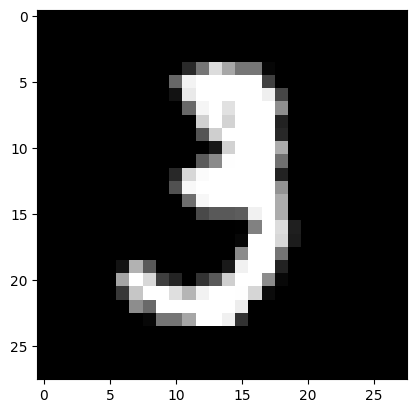

In [99]:
image,label=dataset[10]
plt.imshow(image,cmap='gray')
print(f"Number: {label}")

# Splitting Our Data

<img src = 'https://imgur.com/T8ENrcX.png' width = 500/>

We split our data into three different sets:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

The MNIST dataset comes with 60,000 images in the training set and 10,000 testing images for the evaluation of our model.

In [100]:
import torchvision.transforms as transforms

In [101]:
transform = ### YOUR CODE HERE ### 

In [102]:
testing_ds = MNIST(root = 'data/',
                   train = False,
                   transform = ### YOUR CODE HERE ### ) #transform to tensor
dataset = MNIST(root='data/',
                train=True,
                transform= ### YOUR CODE HERE ### )#transform to tensor

In [103]:
len(testing_ds), len(dataset)

(10000, 60000)

** As the 60,000 dataset segemenent does not include a segment for validation and training data, we will need to manually split it up.

We do this using the `random_spilt` function in PyTorch in the data utils module. This is just so that we can have a good representation of the whole data set in our split. As when you have a dataset the way its sorted may mean when we select for example 50,000 images for our training set we may not have any number 9's and our 10,000 images for our validation set may be just 9's.

In [105]:
from torch.utils.data import random_split
training_ds, validation_ds = ### YOUR CODE HERE ###  #try to split the data, how do you use random split?

In [ ]:
len(training_ds), len(validation_ds)

(40000, 10000)

# Data Loader

In [107]:
from torch.utils.data import DataLoader

BATCH_SIZE = 128

training_loader = ### YOUR CODE HERE ###  #check out the dataloader input field. You should focus on what you want to pass on, the batch size, and whether do you want to shuffle it or not
validation_loader = ### YOUR CODE HERE ### 

For the training loadee `shuffle = True`, which just shuffles the data, to make sure the batches in each epoch are different. You want to shuffle your data after each epoch because you will always have the risk to create batches that are not representative of the overall dataset, and therefore, your estimate of the gradient will be off.  

# Creating our Model

Logistic Regression model is relatively similar to a linear regression model, where the predicted output is obtained via the following:

```
p = x @ w.t() + b
```
However, this time we will use the `nn.Linear` to create the model. Which applies a linear transformation to the incoming data: `y = xA^T + b`


In [108]:
image,label = training_ds[0]
print(f"Dimensions: {image.shape}")
print(image.dtype)

Dimensions: torch.Size([1, 28, 28])
torch.float32


We know we have 10 images classes, as any given image is a number between 0 - 9, and our vector provided to `nn.Linear` will be of size (784) so we will reshape our image into 2D using the `.reshape` method.

All PyTorch models are created by extending the `nn.Module` class

In [109]:
import torch.nn as nn

In [117]:
class LrModel(nn.Module):
    def __init__(self,input_size,output_size): # Sub Class
        super().__init__()
        self.linear = nn.Linear(### YOUR CODE HERE ###) #what are the required parameters?

    def forward(self, x):
        x = x.reshape(-1, ### YOUR CODE HERE ### ) #You will be passing 'x' to linear, what do you think the flattened dimension of 'x' will be? what is 'x' in this case?
        x = self.linear(x)
        return x

In [118]:
model = LrModel(### YOUR CODE HERE ### ) #What values will the input and output sizes will be?

# Training and Validation Loops

- This is over one epoch

In [113]:
from tqdm.notebook import tqdm

In [134]:
# Function for the validation pass
def train(model, train_loader, loss_fn, optimizer):
    model.train() # puts the model in validation mode
    running_loss = 0

    with tqdm(total=len(train_loader)) as pbar:
        for images, labels in iter(train_loader): #batch in val loader

            ### YOUR CODE HERE ### 

            running_loss += loss.item()

            pbar.update(1)
    return running_loss/len(train_loader) # return loss value, accuracy

In [135]:
# Function for the validation pass
def validation(model, val_loader, loss_fn):
    model.eval() # puts the model in validation mode
    running_loss = 0
    total = 0
    correct = 0

    with torch.no_grad(): # save memory by not saving gradients which we don't need
        with tqdm(total=len(val_loader)) as pbar:
            for images, labels in iter(val_loader): #batch in val loader

                ### YOUR CODE HERE ### 
                
                running_loss += val_loss.item()


                # Essentially measuring accuracy by checking the percantage of labels that have been correctly predicted
                _, predicted = torch.max(outputs, 1) # turns class probability predictions to class labels
                total += labels.size(0) # sums the number of predictions
                correct += (predicted == labels).sum().item() # sums the number of correct predictions

                pbar.update(1)

        return running_loss/len(val_loader), correct/total # return loss value, accuracy

You might be asking how does our model output probabilities for us to take the max and say, we are 60% confident the image inputted is a 8. With our Cross Entropy Loss function PyTorch will convert these weight sums to probablities using the softmax fucntion.

How does it work?

<img src = 'https://img.youtube.com/vi/lvNdl7yg4Pg/0.jpg' width=400/>



In [115]:
from torch.nn.functional import softmax

In [119]:
for images,labels in training_loader:
  outputs = model(images)
  break

print(outputs[0:5])

tensor([[-0.0534, -0.0281,  0.0247, -0.0906,  0.0710,  0.2506,  0.2056,  0.0840,
          0.1707,  0.4874],
        [ 0.0019,  0.1991, -0.0429, -0.0197,  0.0196,  0.0697,  0.0739, -0.1257,
          0.2912,  0.5190],
        [-0.0298,  0.1478,  0.0578,  0.1915, -0.1550, -0.3201,  0.2413,  0.1159,
         -0.0105,  0.2687],
        [ 0.1874,  0.1161,  0.2429,  0.0021, -0.0707, -0.1009,  0.0188,  0.0062,
         -0.0136,  0.3773],
        [ 0.0763,  0.0079,  0.0944,  0.0271, -0.0419,  0.2319, -0.1987, -0.0613,
          0.0180,  0.2647]], grad_fn=<SliceBackward0>)


In [120]:
probability = softmax(outputs,1)
print(probability[0:5])

tensor([[0.0835, 0.0857, 0.0903, 0.0805, 0.0946, 0.1132, 0.1082, 0.0958, 0.1045,
         0.1435],
        [0.0892, 0.1087, 0.0853, 0.0873, 0.0908, 0.0955, 0.0959, 0.0785, 0.1191,
         0.1496],
        [0.0909, 0.1086, 0.0992, 0.1134, 0.0802, 0.0680, 0.1192, 0.1052, 0.0927,
         0.1225],
        [0.1105, 0.1029, 0.1168, 0.0918, 0.0854, 0.0828, 0.0934, 0.0922, 0.0904,
         0.1336],
        [0.1026, 0.0959, 0.1045, 0.0977, 0.0912, 0.1199, 0.0780, 0.0894, 0.0968,
         0.1239]], grad_fn=<SliceBackward0>)


In [121]:
print(torch.max(probability[0:5],1))

torch.return_types.max(
values=tensor([0.1435, 0.1496, 0.1225, 0.1336, 0.1239], grad_fn=<MaxBackward0>),
indices=tensor([9, 9, 9, 9, 9]))


In [122]:
torch.flatten(labels[0:5])

tensor([1, 0, 7, 9, 0])

# Loss Functions
Cross Entropy Loss function is often used for classification problems, it works by taking the predicted probability for the correct label, so from above in the first row it would be its max value. It then logs this number so high probs (0.89etc) will have a value loss value closer to 0 and lower probs a loss value closer to 1.

The average of all the losses is the overall loss for the batch.

Access loss functions from `torch.nn`

# Training

In [139]:
loss_fn = ### YOUR CODE HERE ###  #what loss function here shuold we use? what kind of a problem is this?
optimizer = torch.optim.SGD(model.parameters(), lr = ### YOUR CODE HERE ### ) #feel free to play around with the

In [140]:
def fit(total_epoch, model, training_loader, loss_fn, optimizer, validation_loader):
  for epoch in range(total_epoch): # loops through number of epochs
    train_loss = train(model, training_loader, loss_fn, optimizer)  # train the model for one epoch
    val_loss, accuracy = validation(model, validation_loader, loss_fn) # after training for one epoch, run the validation() function to see how the model is doing on the validation dataset
    print("Epoch: {}/{}, Training Loss: {}, Val Loss: {}, Val Accuracy: {}".format(epoch+1, total_epoch, train_loss, val_loss, accuracy))
    print('-' * 20)

  print("Finished Training")

In [141]:
fit(5, model, training_loader, loss_fn, optimizer, validation_loader)

  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch: 1/5, Training Loss: 1.9691628732681274, Val Loss: 1.8242950216929117, Val Accuracy: 0.6843333333333333
--------------------


  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch: 2/5, Training Loss: 1.7052857831319173, Val Loss: 1.5958370068868002, Val Accuracy: 0.7499583333333333
--------------------


  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch: 3/5, Training Loss: 1.5055849498112996, Val Loss: 1.4222709325154623, Val Accuracy: 0.7742708333333334
--------------------


  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch: 4/5, Training Loss: 1.3530272668202719, Val Loss: 1.2887234366734823, Val Accuracy: 0.7881041666666667
--------------------


  0%|          | 0/375 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

Epoch: 5/5, Training Loss: 1.2347016201019287, Val Loss: 1.1841593446731566, Val Accuracy: 0.8000416666666667
--------------------
Finished Training


# Testing + Saving & Loading Weights

In [142]:
testing_ds

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

Predicted:3 Label:5


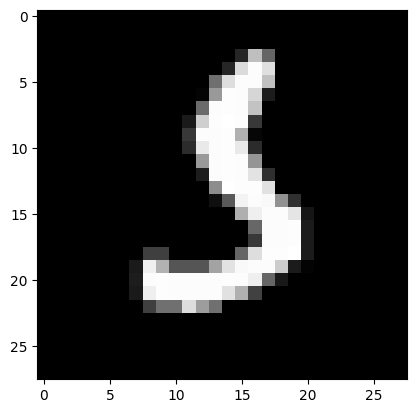

In [143]:
image, label = testing_ds[340]
plt.imshow(image[0],cmap='gray')
x = image.unsqueeze(0)
x = model(x)
_,predictions = torch.max(x,1)
print(f"Predicted:{predictions[0].item()} Label:{label}")

In [144]:
testing_loader = DataLoader(testing_ds,batch_size=10000,shuffle = False)
loss, accuracy = validation(model, testing_loader, loss_fn)
print(f"Loss: {loss}, Accuracy: {accuracy}")

  0%|          | 0/1 [00:00<?, ?it/s]

Loss: 1.1652278900146484, Accuracy: 0.812


Try to visualise a batch of prediction using matplotlib subplots!

In [145]:
#explore in your group on how to use matplotlib subplots!

## How to save weights and biases

As the topology of loss landscapes can be vastly complex there is potential that your model may not have the best set of weights and biases as, you could well and truly be in a decent local minima, however there may be a better solution. As such you may want to train you model a few times and pick the best sets of weights and biases.

In [146]:
torch.save(model.state_dict(),'lr_model1') # returns an OrderedDict

To retrain instantiate your model class

In [147]:
pretrained_model = LrModel(784,10)

In [148]:
pretrained_model.load_state_dict(torch.load('lr_model1'))

<All keys matched successfully>

In [149]:
testing_loader = DataLoader(testing_ds,batch_size=10000,shuffle = False)
loss, accuracy = validation(pretrained_model, testing_loader, loss_fn)
print(f"Loss: {loss}, Accuracy: {accuracy}")

  0%|          | 0/1 [00:00<?, ?it/s]

Loss: 1.1652278900146484, Accuracy: 0.812
